![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# In-situ Wind speed completeness for climate monitoring

Production date: 10/12/2025

Produced by: Beatriz Lopes and Ana Oliveira (CoLAB +ATLANTIC)

## 🌍 Use case: Adaptation to Climate Extremes.

## ❓ Quality assessment question
*  **How consistent are Extreme Wind Days from E-OBS compared to those from reanalysis and in-situ products?**

We aim to evaluate the consistency of the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations (henceforth, E-OBS) from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S), and analyse the consistency of E-OBS extreme wind speed (WS) trends, over a given Area of Interest (AoI), as a regional example of using E-OBS in the scope of the European State of Climate [[1]](https://climate.copernicus.eu/esotc/2023). We will access the E-OBS data and perform a comparison of the Extreme Wind Days Index derived from E-OBS, HadISD weather station and ERA5.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Daily wind speed (WS) from E-OBS offers complete temporal-spatial coverage over the AoI, showing significative inter-annual variability and significant trends, consistent with findings reported in the literature  [[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).
* According to [[9]](https://doi.org/10.5194/asr-20-91-2023), E-OBS demonstrates better accuracy in capturing local wind patterns, with E-OBS showing good agreement in regions with dense station networks and a better depiction of wind stilling trends. 
* As is the case with the previous studies focusing on the other E-OBS variables [[4]](https://doi.org/10.1029/2017JD028200)[[5]](https://doi.org/10.1002/JOC.7269)[[6]](https://doi.org/10.1029/2009JD011799)[[7]](https://doi.org/10.1029/2020EA001633)[[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023), this dataset tends to show a superior level of local detail, especially in regions with dense data.
* The findings thus support that E-OBS is a reliable source of climate data for local applications, especially in locations where geographic factors may lead to more localized wind patterns, and when focusing on depicting wind stilling or extremes. Furthermore, by offering a tuned ensemble spread, E-OBS helps users to determine the uncertainty of their added-value applications, providing an efficient way of catering for uncertainty of their results.  Indeed, as the density and location of all input stations are not fully available, the ensemble spread should be used as a complementary indicator of the confidence level and variability of WS.
```

```{figure} 68ef54e7-ac30-4728-b682-ceb6940bbebd.png
Figure A. Trends of Extreme Wind Days Index for in-situ, E-OBS and ERA5, with reference period of 1991-2020.
```

## 📋 Methodology
This notebook provides an assessment of the wind speed completeness for climate monitoring from **E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations dataset**, [E-OBS](https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview). It achieves this by examining the trends of the Extreme Wind Days using a Mann-Kendall and Sen's slope linear trend estimation and comparing them with the same trends calculated from ERA5 and one in-situ HadISD station, at the in-situ station location.

The analysis and results follow the next outline:

**[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1)**
- **[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.1)**
- **[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.2)**
- **[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.3)**


**[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2)**
- **[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2.1)**
- **[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2.2)**

**[](insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-3)**

## 📈 Analysis and results

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1)= 
### 1. Define the AoI, search and download E-OBS

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.1)= 
#### 1.1. Import required packages
We will be working with data in NetCDF format. To best handle this data, we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case, we will use Matplotlib and Cartopy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymannkendall as mk
import scipy.stats
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import display
import pooch

plt.style.use("seaborn-v0_8-notebook")

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.2)= 
#### 1.2. Data overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the E-OBS daily gridded meteorological data for Europe from 1950 to present, derived from in-situ observations. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 
E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at regular latitude-longitude grid intervals (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 
The E-OBS version used for this Use Case, E-OBSv31.0e, was released in October 2023 and its main difference from the previous E-OBSv30.0e is the inclusion of new series.
Having selected the correct dataset, we now need to specify what product type, variables, and temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of daily mean wind speed (FG) will be used, considering the last version available (31.0e). These can all be selected in the “Download data” tab from the CDS. In this tab, a form appears in which we will select the following parameters to download, for example:
- Product Type: Ensemble mean  
- Variable: daily mean wind speed
- Grid resolution: 0.25  
- Period: Full period  
- Version: 31.0e  
- Format: Zip file (.zip)
At the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-1.3)= 
#### 1.3. Download and prepare E-OBS data

… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below. Furthermore, in this use case, the following 30-year climatological period is considered, as per the guidelines from WMO [[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130):
- 1991 to 2020

In [2]:
# Define analysis time period
year_start = "1981"
year_stop = "2020"

The first step will be to download one in-situ HadISD station, which we will use to complement the analysis. From that, we can get the station coordinates and download E-OBS WS data.
HadISD is a global sub-daily dataset based on the National Oceanic and Atmospheric Administration (NOAA) ISD dataset. The variables present in the dataset are quality controlled for wind speed and direction, as well for temperature, dewpoint temperature, sea-level pressure and cloud data. The data are provided as netCDF files, one per station.
https://www.metoffice.gov.uk/hadobs/hadisd/
We are going to use the station 035900-99999. 

First, let's download the in-situ HadISD station we are going to use.

In [3]:
url = "https://www.metoffice.gov.uk/hadobs/hadisd/v343_2025f/data/hadisd.3.4.3.2025f_19310101-20250829_035900-99999.nc.gz"
known_hash = "6b4abd0c69b240c651998255e00af0ebf277c4a1d2ae25e0eb26b0c815f4dfca"
filename = pooch.retrieve(url=url, known_hash=known_hash, processor=pooch.Decompress())
in_situ_data = xr.open_dataset(filename, chunks={})

da_in_situ = in_situ_data['windspeeds'].sel(time=slice(year_start, year_stop))
#Filter for minimum an maximum valid values
da_in_situ = da_in_situ.where((da_in_situ >=0) & (da_in_situ <= 31.4))
# Resample in-situ data to daily mean
da_in_situ = da_in_situ.resample(time="1D").mean(keep_attrs=True)

# Extract lat/lon and station IDs
lat = in_situ_data.latitude
lon = in_situ_data.longitude

In [4]:
# Inspect the data
in_situ_data

<xarray.Dataset> Size: 411MB
Dimensions:                (time: 449803, test: 71, flagged: 19,
                            reporting_v: 19, reporting_t: 1140, reporting_2: 2,
                            coordinate_length: 1)
Coordinates:
  * time                   (time) datetime64[ns] 4MB 1973-01-01 ... 2025-08-2...
    longitude              (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    latitude               (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    elevation              (coordinate_length) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: test, flagged, reporting_v, reporting_t,
                                reporting_2, coordinate_length
Data variables: (12/27)
    station_id             |S12 12B ...
    temperatures           (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    dewpoints              (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    slp                    (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    stnlp                  (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    windspeeds             (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    ...                     ...
    wind_gust              (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    past_sigwx1            (time) float64 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    input_station_id       (time) object 4MB dask.array<chunksize=(449803,), meta=np.ndarray>
    quality_control_flags  (time, test) float64 255MB dask.array<chunksize=(112451, 15), meta=np.ndarray>
    flagged_obs            (time, flagged) float64 68MB dask.array<chunksize=(149935, 7), meta=np.ndarray>
    reporting_stats        (reporting_v, reporting_t, reporting_2) float64 347kB dask.array<chunksize=(19, 1140, 2), meta=np.ndarray>
Attributes: (12/39)
    title:                       HadISD
    institution:                 Met Office Hadley Centre, Exeter, UK
    source:                      HadISD data product
    references:                  Dunn, 2019, Met Office Hadley Centre Technic...
    creator_name:                Robert Dunn
    creator_url:                 www.metoffice.gov.uk
    ...                          ...
    station_information:         Where station is a composite the station id ...
    Conventions:                 CF-1.6
    Metadata_Conventions:        Unidata Dataset Discovery v1.0, CF Discrete ...
    featureType:                 timeSeries
    processing_date:             01-Oct-2025
    history:                     Created by mk_netcdf_files.py \nDuplicate Mo...

Now we can plot the station 035900-99999 coordinates.

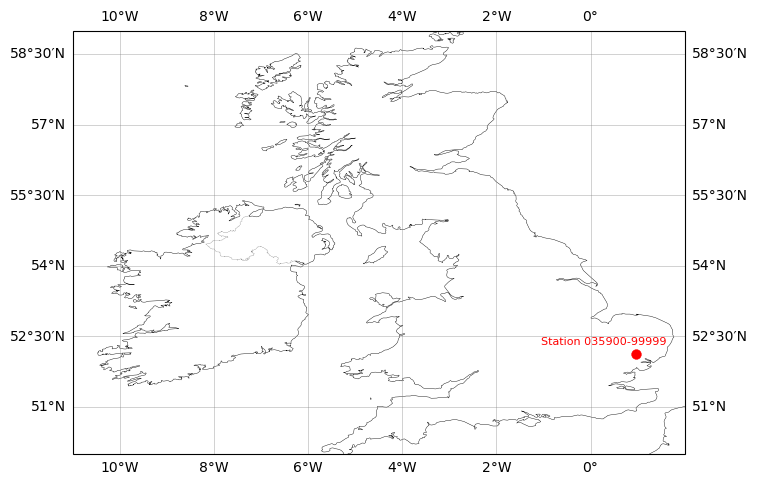

In [5]:
# Plot station cordinates on a map
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add gridlines
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
             linewidth=0.5, color='gray', alpha=0.5)

# Plot station markers
ax.scatter(lon, lat, color='red', s=50, marker='o', label='Station')

# Annotate each station
ax.text(lon-2, lat+0.2, 'Station 035900-99999',fontsize=8, color='red')

# Zoom to region of interest
ax.set_extent([2, -11, 50, 59])

plt.show()

We will download the WS data from both E-OBS for the pixel closest to the station 035900-99999. Since the station coordinates do not exactly match the E-OBS grid points, we will first select a small area around the station and then identify the nearest pixel within that area.

In [6]:


# Define request
collection_id = "insitu-gridded-observations-europe"
request = {
    "variable": ["wind_speed"],
    "grid_resolution": "0_25deg",
    "period": "full_period",
    "version": ["31_0e"],
    "area": [lat+0.1, lon-0.1, lat-0.1, lon+0.1],
}

# Download EOBS data
da_eobs_at_station = download.download_and_transform(
    collection_id,
    request | {"product_type": "ensemble_mean"},
)["fg"]
da_eobs_at_station = da_eobs_at_station.sel(time=slice(year_start, year_stop))

# Extract E-OBS data at station 035900-99999
da_eobs_at_station = da_eobs_at_station.sel(latitude=lat, longitude=lon, method="nearest")

100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


To complement, we will also download ERA5 reanalysis wind data.

In [7]:
collection_id_era5 = "reanalysis-era5-single-levels"

request_era5 = {
    "product_type": ["ensemble_mean"],
    "variable": ["10m_u_component_of_wind", "10m_v_component_of_wind"],
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": [lat+0.2, lon-0.2, lat-0.2, lon+0.2],
    
}

request_era5 = download.update_request_date(request_era5, year_start, year_stop)

# Process the request
# ds_ERA_5_at_station = download.download_and_transform(collection_id_era5, request_era5, chunks={"year": 1}, n_jobs=2)
ds_ERA_5_at_station = download.download_and_transform(collection_id_era5, request_era5, chunks={"year": 1})
# Calculate wind speed from u and v components
ds_ERA_5_at_station["windspeed"] = np.sqrt(ds_ERA_5_at_station["u10"] ** 2 + ds_ERA_5_at_station["v10"] ** 2)

# Calculate daily mean for ERA5
ds_ERA_5_at_station = ds_ERA_5_at_station.resample(forecast_reference_time="1D").mean()
# Rename time variables
ds_ERA_5_at_station = ds_ERA_5_at_station.rename({"forecast_reference_time": "time"})
ds_ERA_5_at_station = ds_ERA_5_at_station.mean(dim="leadtime")

# Extract ERA5 data at station 035900-99999
da_era5_at_station = ds_ERA_5_at_station.sel(latitude=lat, longitude=lon, method="nearest")['windspeed']

100%|██████████| 40/40 [00:04<00:00,  8.47it/s]
/data/common/miniforge3/envs/wp5/lib/python3.12/site-packages/earthkit/data/utils/kwargs.py:59: UserWarning: In xarray_open_dataset_kwargs backend_kwargs, overriding the default value (squeeze=False) with squeeze=True is not recommended.
  warnings.warn(


Now we can concatenate all the needed datasets to facilitate the next calculations.

In [8]:
# Concatenate datasets along the "product" dimension
da_timeseries_at_station = xr.concat(
    [
        da_in_situ.expand_dims(product=["in-situ"]),
        da_eobs_at_station[:,0].expand_dims(product=["E-OBS"]),
        da_era5_at_station[:,0].expand_dims(product=["ERA5"]),
    ],
    dim="product",
    compat="override",     # ignore small coord mismatches
    coords="minimal",      # keep only shared coordinates
)

/data/wp5/.tmp/ipykernel_1437884/3541929507.py:2: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  da_timeseries_at_station = xr.concat(


In [9]:
# Inspect the dataset
da_timeseries_at_station

<xarray.DataArray 'windspeeds' (product: 3, time: 14610)> Size: 351kB
dask.array<concatenate, shape=(3, 14610), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 24B 'in-situ' 'E-OBS' 'ERA5'
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31
    longitude    float64 8B 0.975
    latitude     float64 8B 52.12
    elevation    float64 8B dask.array<chunksize=(), meta=np.ndarray>
    realization  int64 8B ...
    surface      float64 8B ...
Attributes:
    long_name:      Wind speed at mast height (~10m)
    units:          meters per second
    flagged_value:  -2e+30
    valid_min:      0.0
    valid_max:      31.4
    standard_name:  wind_speed
    cell_methods:   latitude: longitude: time: point (nearest to reporting hour)

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2)=
### 2. Analyse the Extreme Wind Days Index


(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2.1)=  
#### 2.1. Calculate the annual frequency of positive Extreme Wind Days index and the linear trend
We will calculate the number of days when WS surpass the 98th percentile threshold over a given reference period. Here, we will use the climatology referred earlier, which is the most recent climatology (i.e., 1991-2020). Also called the 'Extreme Wind Days Index', this index is part of the Severe Storm hazard type of the Wind category of the classification, as described in the European Climate Data Explorer (ECDE). More information on this index can be consulted on the ECDE website [[2]](https://climate-adapt.eea.europa.eu/en/knowledge/european-climate-data-explorer) or its confluence page on indicators.

In [10]:
# Remove '02-29' from the data
da_timeseries_at_station = da_timeseries_at_station.where(da_timeseries_at_station['time'].dt.strftime("%m-%d") != '02-29', drop=True)

# Ensure 'dayofyear' coordinate exists
da_timeseries_at_station = da_timeseries_at_station.assign_coords(dayofyear=da_timeseries_at_station['time'].dt.dayofyear)

# Select data from 1991 to 2020
da_timeseries_at_station = da_timeseries_at_station.sel(time=slice('1991-01-01', '2020-12-31'))

# Compute 98th percentile per day of year
percentile_98 = (da_timeseries_at_station.groupby("dayofyear").quantile(0.98, dim="time", method="nearest"))

# Define smoothing window
window_size = 15
half_window = window_size // 2

# Pad at edges
padded = xr.concat([percentile_98.isel(dayofyear=slice(-half_window, None)), percentile_98,percentile_98.isel(dayofyear=slice(None, half_window))],dim='dayofyear')

# Apply 15-day rolling mean
smoothed_percentile_98 = padded.rolling(dayofyear=window_size, center=True, min_periods=window_size).mean()

# Remove padding
smoothed_percentile_98 = smoothed_percentile_98.isel(dayofyear=slice(half_window, -half_window))

# Map smoothed threshold back to time
smoothed_threshold = smoothed_percentile_98.sel(dayofyear=da_timeseries_at_station['time'].dt.dayofyear)

# Compute exceedance (ensuring no dayofyear remains)
exceedance = da_timeseries_at_station > smoothed_threshold

In [11]:
# Inspect the threshold dataset 
smoothed_threshold

<xarray.DataArray 'windspeeds' (product: 3, time: 10950)> Size: 263kB
dask.array<getitem, shape=(3, 10950), dtype=float64, chunksize=(3, 14), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 24B 'in-situ' 'E-OBS' 'ERA5'
  * time         (time) datetime64[ns] 88kB 1991-01-01 1991-01-02 ... 2020-12-31
    quantile     float64 8B 0.98
    dayofyear    (time) int64 88kB 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
    longitude    float64 8B 0.975
    latitude     float64 8B 52.12
    elevation    float64 8B dask.array<chunksize=(), meta=np.ndarray>
    realization  int64 8B 0
    surface      float64 8B 0.0
Attributes:
    long_name:      Wind speed at mast height (~10m)
    units:          meters per second
    flagged_value:  -2e+30
    valid_min:      0.0
    valid_max:      31.4
    standard_name:  wind_speed
    cell_methods:   latitude: longitude: time: point (nearest to reporting hour)

Let's inspect the 98th percentile threshold.

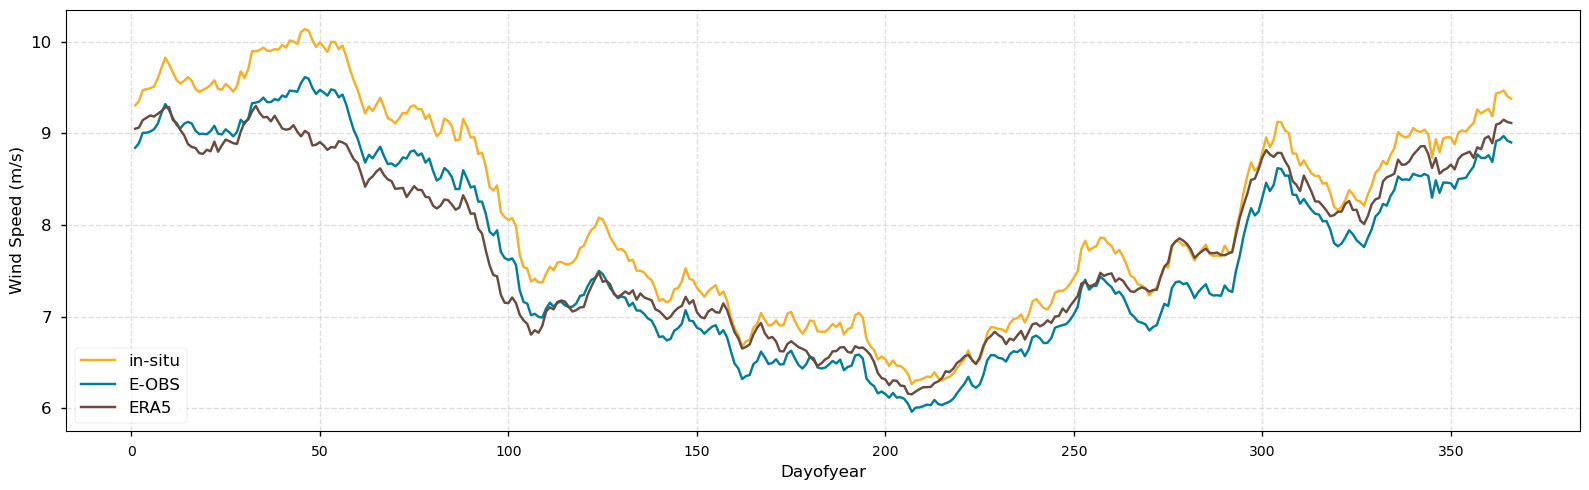

In [12]:
# Choose color for each product plot
colors = {
    "in-situ": "#F5B026",
    "E-OBS": "#007E99",
    "ERA5": "#6A4A3C",
}

# Plot 
fig, ax = plt.subplots(figsize=(16, 5))
for name in smoothed_threshold.product.values:
    data = smoothed_threshold.sel(product=name).sortby("dayofyear")

    ax.plot(
        data.dayofyear,
        data,
        label=name,
        color=colors[name],
    )

plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xlabel("Dayofyear", fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

From the plot, it is evident that the 98th percentiles derived from the in-situ, E-OBS, and ERA5 datasets are broadly consistent, with differences typically below 0.5 m/s. However, there are some differences between the three datasets. Both E-OBS and ERA5 systematically underestimate the 98th percentile relative to the in-situ observations. Additionally, ERA5 values are generally lower than those of E-OBS until late February, after which ERA5 typically exceeds E-OBS.

Now we are going to calculate some statistics over the exceedance days: annual frequency, mean and max intensity of extreme WS days. 

In [13]:
# Create a new pandas DataFrame with number of exceedance days, mean and maximum intensity per year for each product 
# First we can drop unneeded coordinates
dims_to_keep = ["product", "time"]

exceedance = exceedance.drop_vars(
    [v for v in exceedance.coords if v not in dims_to_keep],
    errors="ignore"
)

da_timeseries_at_station = da_timeseries_at_station.drop_vars(
    [v for v in da_timeseries_at_station.coords if v not in dims_to_keep],
    errors="ignore"
)

In [14]:
da_timeseries_at_station

<xarray.DataArray 'windspeeds' (product: 3, time: 10950)> Size: 263kB
dask.array<getitem, shape=(3, 10950), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * product  (product) object 24B 'in-situ' 'E-OBS' 'ERA5'
  * time     (time) datetime64[ns] 88kB 1991-01-01 1991-01-02 ... 2020-12-31
Attributes:
    long_name:      Wind speed at mast height (~10m)
    units:          meters per second
    flagged_value:  -2e+30
    valid_min:      0.0
    valid_max:      31.4
    standard_name:  wind_speed
    cell_methods:   latitude: longitude: time: point (nearest to reporting hour)

In [15]:
# Exceedance days per year (True = 1)
exceed_days = exceedance.groupby("time.year").sum()

# Mean windspeed on exceedance days
mean_intensity = (
    da_timeseries_at_station.where(exceedance)
    .groupby("time.year")
    .mean()
)

# Max windspeed on exceedance days
max_intensity = (
    da_timeseries_at_station.where(exceedance)
    .groupby("time.year")
    .max()
)

# Combine into one Dataset 
ds_summary = xr.Dataset({
    "Number of exceedance days": exceed_days,
    "Mean Intensity for exceedance": mean_intensity,
    "Max Intensity for exceedance": max_intensity,
})

# Convert to a clean pandas DataFrame 
# Wide format: products become columns
df_exceedance_summary = ds_summary.to_dataframe().unstack("product")

In [16]:
# Inspect the results
# Initialize an empty dictionary to store results
summary_dict = {}

# Loop over each variable
for var in df_exceedance_summary.columns.levels[0]:  # 'exceedance_days', 'mean_intensity', 'max_intensity'
    df_var = df_exceedance_summary[var]  # select that variable (products are columns)
    
    # Compute mean ± std for each product
    summary_dict[var] = [f"{df_var[product].mean():.2f} ± {df_var[product].std():.2f}" 
                         for product in df_var.columns]

# Combine into a DataFrame
summary_table = pd.DataFrame(summary_dict, index=df_exceedance_summary.columns.levels[1])  # product names as index


summary_table

,Number of exceedance days,Mean Intensity for exceedance,Max Intensity for exceedance
product,,,
in-situ,18.37 ± 9.48,9.11 ± 0.49,11.85 ± 1.27
E-OBS,18.47 ± 9.31,8.58 ± 0.48,11.20 ± 1.12
ERA5,19.30 ± 6.33,8.59 ± 0.30,10.73 ± 0.74


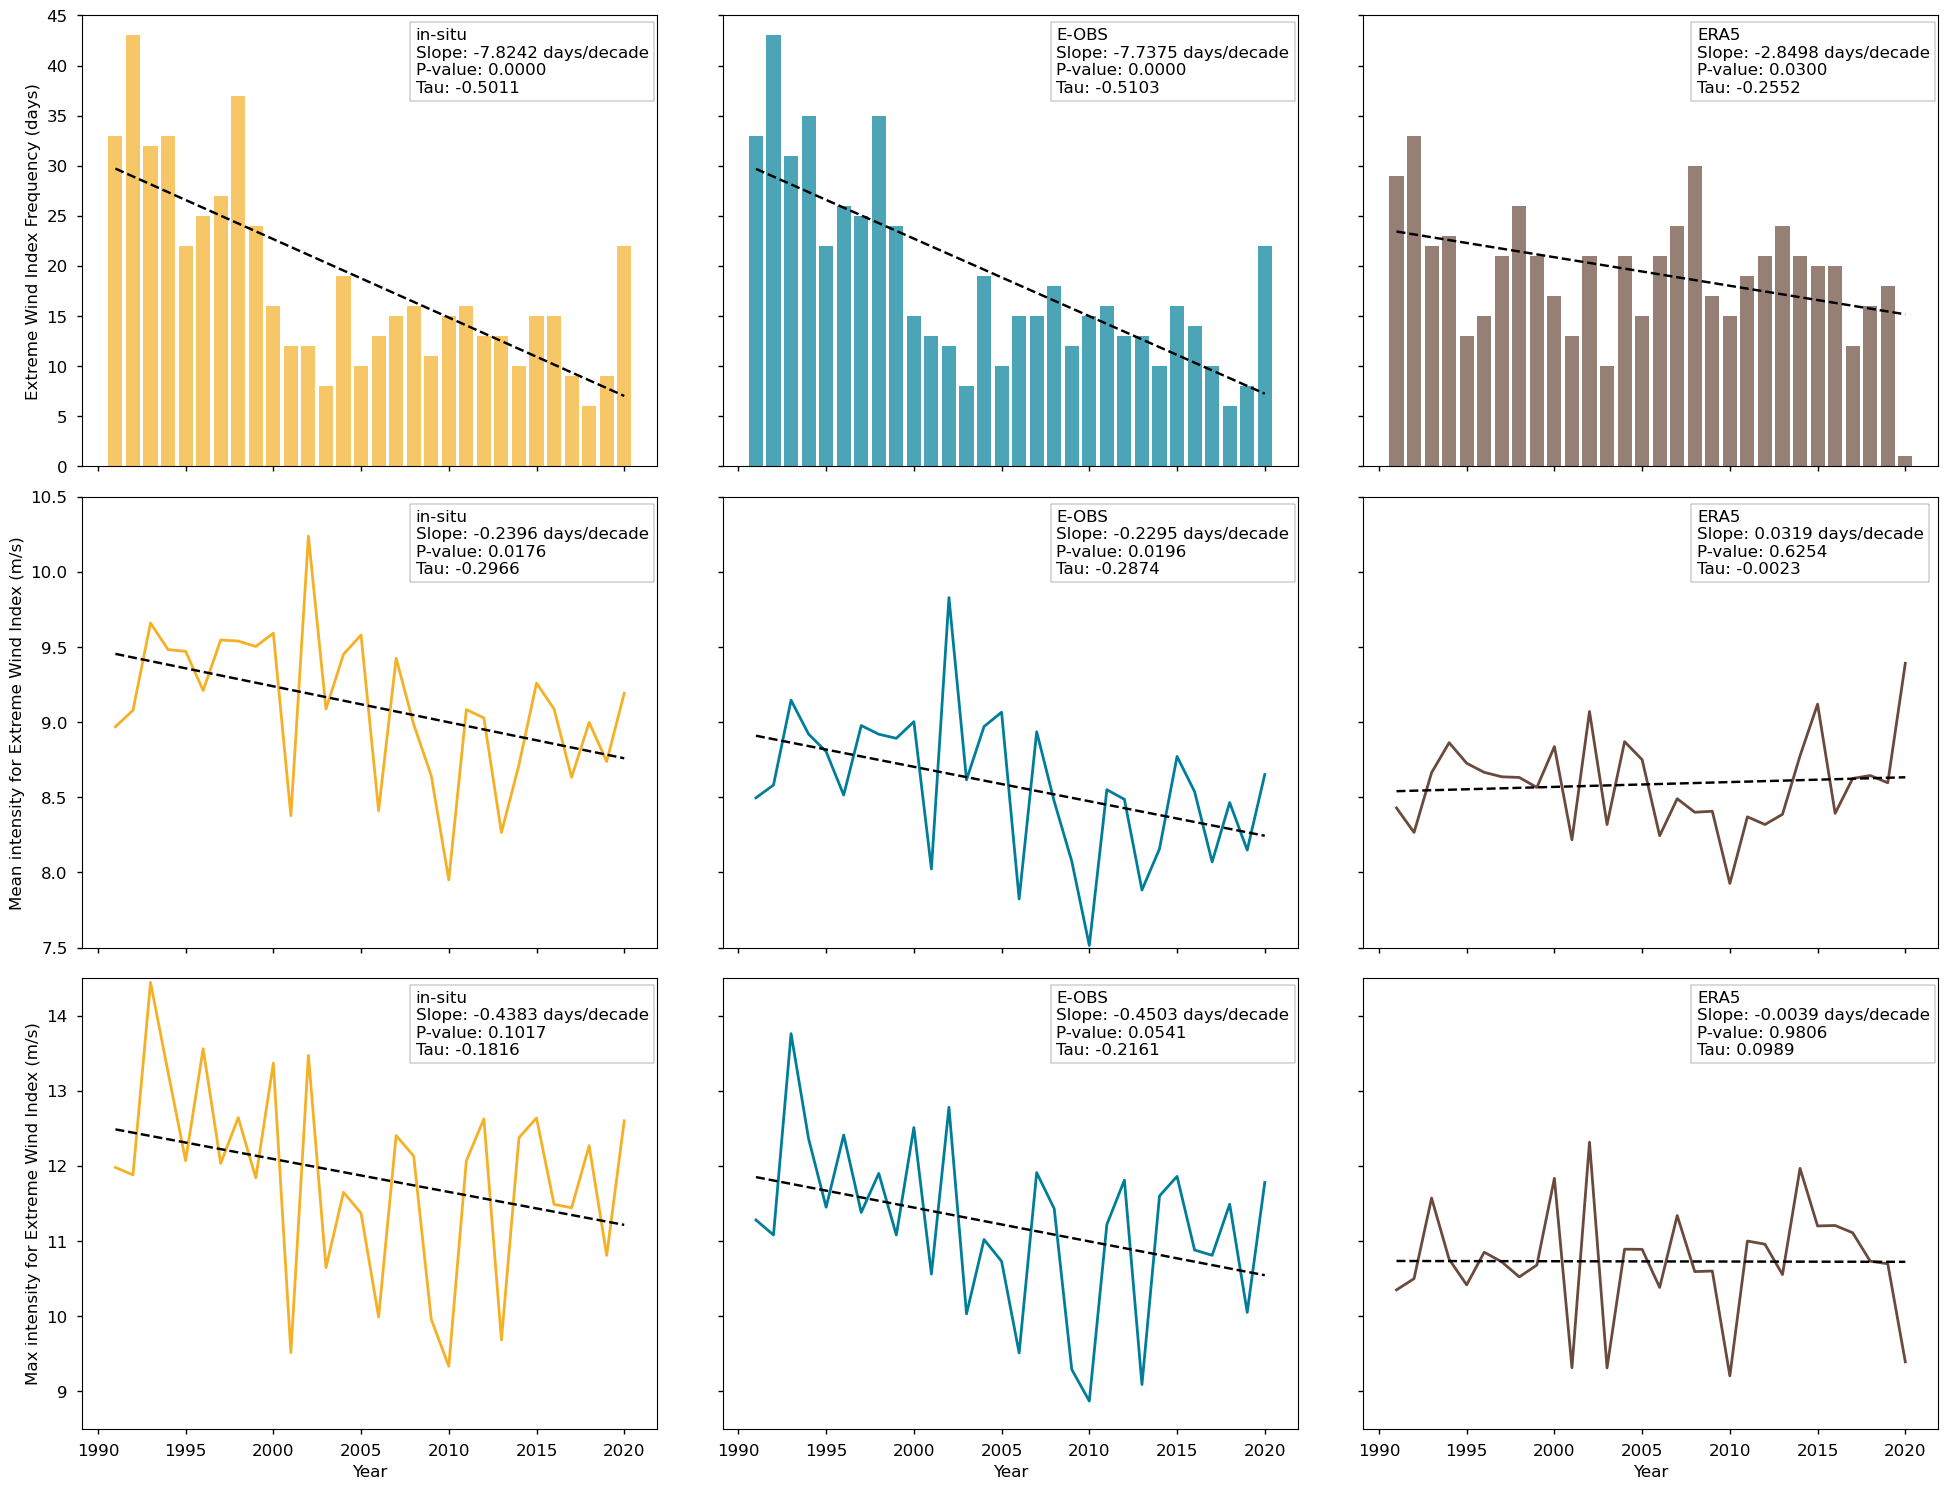

In [17]:
# Create the figure with 3 subplots (one for each product)
fig, axes = plt.subplots(3, 3, figsize=(20, 15), sharex=True)

for i, (ax, product) in enumerate(zip(axes.flat, df_exceedance_summary.columns)):
    
    ts = df_exceedance_summary[product]
    years = ts.index.astype(int)
    y_values = ts.values
    color = colors[product[1]]

    row = i // 3

    # --- First row = bars, others = line plots ---
    if row == 0:
        ax.bar(years, y_values, alpha=0.7, color=color)
        ax.set_ylim(0, 45)  # global limits for first row
    else:
        ax.plot(years, y_values, linewidth=2, color=color)
        ax.set_ylim(7.5, 10.5) if row == 1 else ax.set_ylim(8.5, 14.5)

    # Trend line
    x_values = np.arange(len(years))
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_values, y_values)
    ax.plot(years, intercept + slope * x_values, "--", color="black")

    # Mann-Kendall
    mk_result = mk.original_test(y_values)

    ax.annotate(
        f"{product[1]}\n"
        f"Slope: {slope*10:.4f} days/decade\n"
        f"P-value: {p_value:.4f}\n"
        f"Tau: {mk_result.Tau:.4f}",
        xy=(0.58, 0.83),         
        xycoords="axes fraction", 
        bbox=dict(fc="white", alpha=0.7),
        fontsize=12
    )

    # Remove labels by default; will add only to left/bottom
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', labelbottom=False)  # Hide x-axis tick labels
    ax.tick_params(axis='y', labelleft=False)    # Hide y-axis tick labels

# --- X labels only on bottom row ---
for ax in axes[2, :]:
    ax.set_xlabel("Year", fontsize=12)
    ax.tick_params(axis='x', labelbottom=True, labelsize=12)

# --- Y labels only on left column ---
for r in range(3):
    ax = axes[r, 0]
    ax.tick_params(axis="y", labelleft=True, labelsize=12)
    if r == 0:
        ax.set_ylabel("Extreme Wind Index Frequency (days)", fontsize=12)
    elif r == 1:
        ax.set_ylabel("Mean intensity for Extreme Wind Index (m/s)", fontsize=12)
    else:
        ax.set_ylabel("Max intensity for Extreme Wind Index (m/s)", fontsize=12)

plt.tight_layout()
plt.show()

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-2.2)=  
#### 2.2. Inspect the results

As shown in these plots, there is strong coherence between the Extreme Wind Index obtained with E-OBS and the in-situ observations, both for the metrics presented (extreme wind days frequency, mean and maximum intensity) and their decreasing trends. All datasets exhibit decreasing trends across all metrics, with the exception of the ERA5 mean WS intensity. ERA5 does not capture the strong declining trends observed in the in-situ and E-OBS datasets, instead showing much weaker and, in the case of mean intensity, slightly positive (though not statistically significant) trends. This result suggests that users that are interested in such events should prefer E-OBS.

This result agrees with previous research reporting that E-OBS data shows a tendency for wind stilling over Europe, in the last decades [[8]](https://doi.org/10.1002/joc.8191) [[9]](https://doi.org/10.5194/asr-20-91-2023). 

As described in this dataset's documentation, the usage of this dataset should be done with caution, especially when interpreting trends and extremes, considering the potential limitations in accuracy and completeness in regions where observational data may be scarcer. Furthermore, potential biases should be considered from the interpolation techniques employed, and consider the spatial variability of the variables when interpreting results. As an indicator of the confidence intervals associated with individual grid cells, the ensemble spread may provide insights into the reliability of data in specific locations, aiding in the assessment of uncertainties. In all cases, the intercomparison with reference in situ data is advised.

(insitu_insitu-gridded-observations-europe_extremes-detection_q06:code-section-3)=  
### 3. Main takeaways

- The 98th percentile wind speed thresholds are broadly consistent across datasets, though both E-OBS and ERA5 generally underestimate extremes relative to in-situ observations.

-  Extreme wind speed days have generally declined over the recent decades, in terms of number of days, mean and maximum intensity.

- There is a weak agreement between E-OBS and ERA5 and a strong agreement between E-OBS and in-situ for wind extremes. From this, E-OBS should be the preferred dataset for studying such events. ERA5 shows no significant trend but exhibits higher values and weaker inter-annual variability [[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).

- Users should be cautious when analysing trends and extremes due to potential biases from interpolation techniques and data scarcity. Comparing results with in-situ observations is recommended for validation.

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used was:
* E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations:
    https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview

* ERA5 hourly data on pressure levels from 1940 to present:
    https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview 

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [B-Open](https://www.bopen.eu/)

### References

[[1]](https://climate.copernicus.eu/esotc/2023) Copernicus Climate Change Service. 2024. European State of the Climate 2023.

[[2]](https://climate-adapt.eea.europa.eu/en/knowledge/european-climate-data-explorer) Climate ADAPT.

[[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130) World Meteorological Organization (WMO) Guidelines on the Calculation of Climate Normals: 

[[4]](https://doi.org/10.1029/2017JD028200) Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123.

[[5]](https://doi.org/10.1002/JOC.7269) Bandhauer, Moritz, Francesco Isotta, Mónika Lakatos, Cristian Lussana, Line Båserud, Beatrix Izsák, Olivér Szentes, Ole Einar Tveito, and Christoph Frei. 2022. “Evaluation of Daily Precipitation Analyses in E-OBS (V19.0e) and ERA5 by Comparison to Regional High-Resolution Datasets in European Regions.” International Journal of Climatology 42 (2): 727–47.

[[6]](https://doi.org/10.1029/2009JD011799) Hofstra, Nynke, Malcolm Haylock, Mark New, and Phil D. Jones. 2009. “Testing E-OBS European High-Resolution Gridded Data Set of Daily Precipitation and Surface Temperature.” Journal of Geophysical Research Atmospheres. 

[[7]](https://doi.org/10.1029/2020EA001633) Rivoire, Pauline, Olivia Martius, and Philippe Naveau. 2021. “A Comparison of Moderate and Extreme ERA-5 Daily Precipitation With Two Observational Data Sets.” Earth and Space Science 8 (4): e2020EA001633.

[[8]](https://doi.org/10.1002/joc.8191) de Baar, Jouke H. S., van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene, de Valk, Cees. 2023. “A new E-OBS gridded dataset for daily mean wind speed over Europe.” International Journal of Climatology 43 (13): 6083-6100.

[[9]](https://doi.org/10.5194/asr-20-91-2023) de Baar, Jouke H. S., Nhat Luu, van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene. 2023. “Recent improvements in the E-OBS gridded data set for daily mean wind speed over Europe in the period 1980–2021.” Advances in Science and Research 20: 91-95.